## Example plot for LFPy: In vitro MEA slice set-up. 
* https://github.com/LFPy/LFPy/blob/master/examples/example_MEA.py
* It serves to demonstrate class LFPy. RecMEAElectrode which incorporates discontinous 
extracellular conductivity (MEA chip, slice, saline) in comparison to LFPy.
* RecExtElectrode which incorporates an infinite homogeneous isotropic/anisotropic extracellular
conductivity.

```
Copyright (C) 2017 Computational Neuroscience Group, NMBU.

This program is free software: you can redistribute it and/or modify
it under the terms of the GNU General Public License as published by
the Free Software Foundation, either version 3 of the License, or
(at your option) any later version.

This program is distributed in the hope that it will be useful,
but WITHOUT ANY WARRANTY; without even the implied warranty of
MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
GNU General Public License for more details.
```

In [1]:
import os
from os.path import join
from urllib.request import urlopen
import zipfile
import ssl
import LFPy
import numpy as np
import matplotlib.pyplot as plt

--No graphics will be displayed.


In [2]:

def plot_results(cell, synapse, MEA, electrode):

    time_window = [0, 50]
    syn_idx = synapse.idx

    cell_plot_idxs = [syn_idx]
    cell_plot_colors = {syn_idx: 'y'}
    num_cols = 4

    fig = plt.figure(figsize=[15, 5])
    plt.subplots_adjust(hspace=0.6, wspace=0.3, right=0.99, left=0.03, top=0.9)
    ax1 = fig.add_axes([0.05, 0.5, 0.37, 0.4], aspect=1, frameon=False,
                       xticks=[], yticks=[], title='Top view')
    ax3 = fig.add_axes([0.05, 0.1, 0.37, 0.4], aspect=1, frameon=False,
                       xticks=[], yticks=[], title='Side view')

    ax_ec = fig.add_subplot(1, num_cols, 3, xlim=time_window,
                            xlabel='ms', ylabel=r'$\mu$V',
                            title='Extracellular\npotential')
    ax_v = plt.subplot(1, num_cols, 4, title='Somatic potential',
                       xlabel='ms', ylabel='mV',
                       ylim=[-70, -50], xlim=time_window)

    def elec_clr(idx):
        return plt.cm.nipy_spectral(1. / (len(MEA.x) - 1) * idx)

    l_elec, l_syn = plot_recording_set_up(cell, ax1, ax3, MEA, elec_clr,
                                          syn_idx, cell_plot_colors)
    [ax_v.plot(cell.tvec, cell.vmem[idx, :], c=cell_plot_colors[idx], lw=2)
        for idx in cell_plot_idxs]
    for elec in range(len(MEA.x)):
        ax_ec.plot(cell.tvec, 1000 * (MEA.data[elec]),
                   lw=2, c=elec_clr(elec))
        ax_ec.plot(cell.tvec, 1000 * (electrode.data[elec]),
                   lw=3, c=elec_clr(elec), ls=":")

    l_MEA, = ax_ec.plot(0, 0, lw=1, c="k")
    l_invivo, = ax_ec.plot(0, 0, lw=2, c="k", ls=":")

    fig.legend([l_syn, l_elec, l_MEA, l_invivo],
               ["Synapse", "Electrode", "Slice", "In vivo"],
               frameon=False, numpoints=1, ncol=4, loc=3)
    simplify_axes([ax_v, ax_ec])
    mark_subplots([ax1, ax3, ax_ec, ax_v], ypos=1.05, xpos=-0.1)

    #plt.savefig('example_MEA.pdf', dpi=150)



In [3]:

def plot_recording_set_up(cell, ax_neur, ax_side, MEA, elec_clr,
                          syn_idx, cell_plot_colors):

    for comp in range(cell.totnsegs):
        if comp == 0:
            ax_neur.scatter(cell.x[comp].mean(), cell.y[comp].mean(),
                            s=cell.d[comp],
                            edgecolor='none', color='gray', zorder=10)
        else:
            ax_neur.plot(cell.x[comp], cell.y[comp],
                         lw=cell.d[comp] / 2, color='gray', zorder=10)

    for comp in range(cell.totnsegs):
        if comp == 0:
            ax_side.scatter(cell.x[comp].mean(), cell.z[comp].mean(),
                            s=cell.d[comp],
                            edgecolor='none', color='gray', zorder=10)
        else:
            ax_side.plot(cell.x[comp], cell.z[comp],
                         lw=cell.d[comp] / 2, color='gray', zorder=10)
    for idx in range(len(MEA.x)):
        ax_side.plot(MEA.x[idx], MEA.z[idx] - 10, 's', clip_on=False,
                     c=elec_clr(idx), zorder=10, mec='none')
        ax_side.plot([MEA.x[idx], MEA.x[idx]],
                     [MEA.z[idx] - 10, MEA.z[idx] - 150],
                     c=elec_clr(idx), zorder=10, lw=2)
        ax_neur.plot(MEA.x[idx], MEA.y[idx], 's', c=elec_clr(idx), zorder=10)

    ax_side.axhspan(-250, 0, facecolor='0.5', edgecolor='none')
    ax_side.axhspan(0, MEA.h, facecolor='lightsalmon', edgecolor='none')
    ax_side.axhspan(MEA.h, MEA.h + 250, facecolor='aqua', edgecolor='none')
    ax_neur.axhspan(-500, 500, facecolor='lightsalmon', edgecolor='none')

    l_elec, = ax_neur.plot(MEA.x[0], MEA.y[0], 's', c=elec_clr(0), zorder=0)

    l_syn, = ax_neur.plot(synapse.x, synapse.y, '*',
                          c=cell_plot_colors[syn_idx], ms=15)

    ax_side.plot(synapse.x, synapse.z, '*',
                 c=cell_plot_colors[syn_idx], ms=15)

    ax_neur.arrow(-220, -100, 30, 0, lw=1, head_width=12,
                  color='k', clip_on=False)
    ax_neur.arrow(-220, -100, 0, 30, lw=1, head_width=12,
                  color='k', clip_on=False)
    ax_neur.text(-150, -100, 'x', size=10, ha='center',
                 va='center', clip_on=False)
    ax_neur.text(-220, -20, 'y', size=10, ha='center',
                 va='center', clip_on=False)

    ax_side.arrow(-220, 20, 30, 0, lw=1, head_width=12,
                  color='k', clip_on=False)
    ax_side.text(-140, 25, 'x', size=10, ha='center', va='center')
    ax_side.arrow(-220, 20, 0, 30, lw=1, head_width=12,
                  color='k', clip_on=False)
    ax_side.text(-220, 100, 'z', size=10, ha='center', va='center')

    ax_side.plot([-500, 1250], [MEA.h, MEA.h], color='k')
    ax_side.plot([-500, 1250], [0, 0], 'k')  # PLOTTING BOTTOM OF MEA

    ax_side.plot([1280, 1280], [0, MEA.h], '_-',
                 color='k', lw=2, clip_on=False, solid_capstyle='butt')
    ax_side.text(1300, MEA.h / 2, r'%g $\mu$m' % MEA.h, size=8, va='center')

    ax_side.text(1200, -10, 'MEA', va='top', ha='right')
    ax_side.text(1200, MEA.h, 'Saline', va='bottom', ha='right')
    ax_side.text(1200, MEA.h - 50, 'Tissue', va='top', ha='right')

    ax_side.axis([-300, 1250, -70, MEA.h + 70])
    ax_neur.axis([-300, 1250, -250, 250])

    return l_elec, l_syn

In [4]:

def simplify_axes(axes):
    """
    Right and top axis line is removed from axes or list of axes

    """
    if not isinstance(axes, list):
        axes = [axes]

    for ax in axes:
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.get_xaxis().tick_bottom()
        ax.get_yaxis().tick_left()


def mark_subplots(axes, letters='ABCDEFGHIJKLMNOPQRSTUVWXYZ',
                  xpos=-0.12, ypos=1.15):
    """ Marks subplots in axes (should be list or axes object)
    with capital letters
    """
    if not isinstance(axes, list):
        axes = [axes]

    for idx, ax in enumerate(axes):
        ax.text(xpos, ypos, letters[idx].capitalize(),
                horizontalalignment='center',
                verticalalignment='center',
                fontweight='demibold',
                fontsize=12,
                transform=ax.transAxes)

In [5]:
if not os.path.isfile(join('FromModelDB', 'cells', 'cells', 'j4a.hoc')):
    #get the model files:
    u = urlopen('https://modeldb.science/download/2488',
                context=ssl._create_unverified_context())
    localFile = open('FromModelDB/patdemo.zip', 'wb')
    localFile.write(u.read())
    localFile.close()
    #unzip:
    myzip = zipfile.ZipFile('patdemo.zip', 'r')
    myzip.extractall('FromModelDB/.')
    myzip.close()

FileNotFoundError: [Errno 2] No such file or directory: 'patdemo.zip'

In [6]:

# Define cell parameters
cell_parameters = {
    # from Mainen & Sejnowski, J Comput Neurosci, 1996
    'morphology': join('FromModelDB', 'cells', 'cells', 'j4a.hoc'),
    'cm': 1.0,         # membrane capacitance
    'Ra': 150.,        # axial resistance
    'v_init': -65.,    # initial crossmembrane potential
    'passive': True,   # turn on NEURONs passive mechanism for all sections
    'passive_parameters': {'g_pas': 1. / 30000, 'e_pas': -65},
    'nsegs_method': 'lambda_f',  # spatial discretization method
    'lambda_f': 10.,           # frequency where length constants are computed
    'dt': 2.**-4,      # simulation time step size
    'tstart': 0.,      # start time of simulation, recorders start at t=0
    'tstop': 50.,     # stop simulation at 100 ms.
}

In [7]:

# Create cell
cell = LFPy.Cell(**cell_parameters)
# Align cell
cell.set_rotation(z=np.pi / 0.9, x=0.3)
cell.set_pos(z=100)


In [8]:
# Define synapse parameters
synapse_parameters = {
    'idx': cell.get_closest_idx(x=800., y=0., z=150.),
    'e': 0.,                   # reversal potential
    'syntype': 'ExpSyn',       # synapse type
    'tau': 5.,                 # synaptic time constant
    'weight': .001,            # synaptic weight
    'record_current': True,    # record synapse current
}

In [9]:
# Create synapse and set time of synaptic input
synapse = LFPy.Synapse(cell, **synapse_parameters)
synapse.set_spike_times(np.array([10.]))

In [10]:
# Create a grid of measurement locations, in (mum)
X = np.arange(0, 1001, 500)
Y = np.zeros(X.shape)
Z = np.zeros(X.shape) + 0

In [11]:
# Define electrode parameters
grid_electrode_parameters = {
    'sigma': 0.3,      # extracellular conductivity
    'x': X.flatten(),  # electrode requires 1d vector of positions
    'y': Y.flatten(),
    'z': Z.flatten(),
    "method": "root_as_point",
    'N': np.array([[0, 0, 1]] * X.size),  # surface normals
    'r': 50,              # contact site radius
    'n': 100,               # datapoints for averaging
    "seedvalue": 12,
}

In [12]:
# Define electrode parameters
MEA_electrode_parameters = {
    'sigma_T': 0.3,      # extracellular conductivity
    'sigma_G': 0.0,      # MEA glass electrode plate conductivity
    'sigma_S': 1.5,      # Saline bath conductivity
    'x': X.flatten(),  # electrode requires 1d vector of positions
    'y': Y.flatten(),
    'z': Z.flatten(),
    "method": "root_as_point",
    'N': np.array([[0, 0, 1]] * X.size),  # surface normals
    'r': 50,              # contact site radius
    'n': 100,               # datapoints for averaging,
    'h': 300,
    "seedvalue": 12,
    "squeeze_cell_factor": 0.6,
}

In [13]:

# Run simulation, electrode object argument in cell.simulate
print("running simulation...")
cell.simulate(rec_imem=True, rec_vmem=True)

running simulation...


In [14]:
# Create electrode objects
electrode = LFPy.RecExtElectrode(cell, **grid_electrode_parameters)
MEA = LFPy.RecMEAElectrode(cell, **MEA_electrode_parameters)


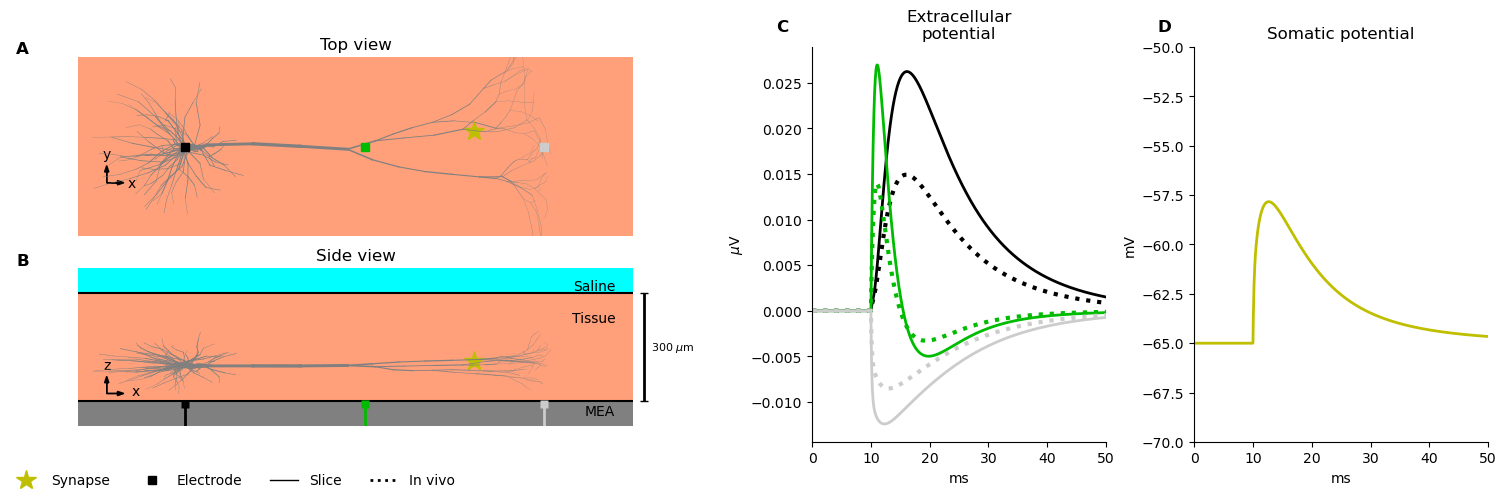

In [15]:
# Calculate LFPs
MEA.data = MEA.get_transformation_matrix() @ cell.imem
electrode.data = electrode.get_transformation_matrix() @ cell.imem
plot_results(cell, synapse, MEA, electrode)
plt.show()